In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
from pathlib import Path

import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("notebook")

plt.rcParams["figure.figsize"] = 12, 5
plt.rcParams["font.family"] = "monospace"

In [4]:
path_root_dir = Path(os.getcwd()).parent
os.chdir(path_root_dir)

In [5]:
path_data = f"{path_root_dir}/data/"

In [6]:
df = pd.read_csv(f"{path_data}/UNmin.csv", index_col=[0, 1])

In [7]:
df

,,lifeMale,lifeFemale,infantMortality,GDPperCapita
country,region,,,,
Afghanistan,Asia,45.0,46.0,154,2848
Albania,Europe,68.0,74.0,32,863
Algeria,Africa,67.5,70.3,44,1531
Angola,Africa,44.9,48.1,124,355
Argentina,America,69.6,76.8,22,8055
...,...,...,...,...,...
Viet.Nam,Asia,64.9,69.6,37,270
Yemen,Asia,57.4,58.4,80,732
Yugoslavia,Europe,69.8,75.3,19,1487


# Cluster the data using different algorithms

In [17]:
from sklearn.preprocessing import StandardScaler

In [13]:
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN, AgglomerativeClustering

In [18]:
X_scaled = StandardScaler().fit_transform(df.values)

In [50]:
km = KMeans(n_clusters=5)

In [51]:
km.fit(X_scaled)

KMeans(n_clusters=5)

In [52]:
srs_cluster = pd.Series(data=km.labels_, index=df.index, name='Cluster')

In [53]:
df_clustered = df.join(srs_cluster)

In [54]:
srs_examples = \
(df_clustered
 .reset_index()
 .groupby('Cluster')
 .apply(lambda fr: fr['country'].sample(5).tolist())
 .map(lambda i: ', '.join(i))
 .rename('countries')
)

## Cluster Profiles

In [55]:
(df_clustered
 .groupby('Cluster')
 .mean()
 .round()
 .join(srs_cluster.value_counts().rename('size'))
 .join(srs_examples)
)

,lifeMale,lifeFemale,infantMortality,GDPperCapita,size,countries
Cluster,,,,,,
0,67.0,73.0,29.0,2277.0,86,"Croatia, China, Mexico, Suriname, Moldova"
1,45.0,48.0,121.0,418.0,23,"Guinea, Niger, Angola, Afghanistan, Central.Af..."
2,73.0,79.0,9.0,13858.0,28,"Bahrain, Qatar, United.Kingdom, Ireland, Cyprus"
3,54.0,57.0,77.0,1117.0,35,"Cambodia, Kiribati, Nepal, Lesotho, Zimbabwe"
4,75.0,81.0,6.0,29682.0,16,"United.States, Luxembourg, Singapore, Denmark,..."


## Selecting the correct value of n_clusters in KMeans

In [63]:
dict_inertia = {}

for N in range(3, 15):
    km_n = KMeans(n_clusters=N)
    km_n.fit(X_scaled)
    dict_inertia[N] = km_n.inertia_

<Axes: title={'center': 'Scree/Knee Plot'}>

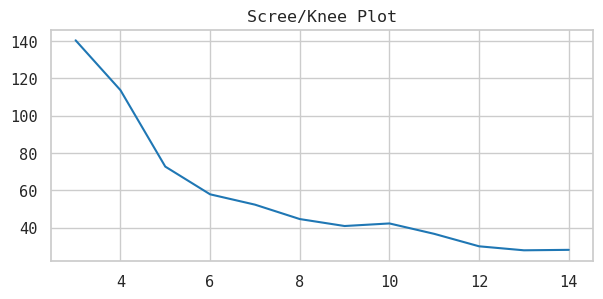

In [66]:
pd.Series(dict_inertia).plot(title='Scree/Knee Plot', figsize=(7, 3))

In [ ]:
# Silhouette Analysis - read on sklearn